In [ ]:
!pip install yfinance
import pandas as pd
import yfinance as yf # import libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
# from IPython.display import FileLink
from google.colab import files
import tqdm.notebook as tq
from pandas_datareader import data as pdr
yf.pdr_override() # <== thats all it takes :-)
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas_ta
import pandas_ta as ta
from itertools import groupby
!pip install monthly-returns-heatmap
import monthly_returns_heatmap as mrh

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=fa11e8af9056db5c99d568dcffe9cb730b39eaf2233f0b9684f7de94086d6dee
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 115 kB 5.1 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=92ea63976e820cebf70b93b4185a0e4a314c3eb521d4cbf240f6899cf1ca957a
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
  Created wheel for monthly-returns-heatmap: filename=monthly_returns_heatmap-0.0.11-py3-none-any.whl size=8111 sha256=9bdbf083b9ee32801191733b3a9576762

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/NIFTYDATA'

Mounted at /content/gdrive
/content/gdrive/MyDrive/NIFTYDATA


In [ ]:
nifty=pd.read_csv('/content/gdrive/MyDrive/NIFTYDATA/nifty_montly_option.csv')

In [ ]:
nifty['Buy']=nifty['Start'] * 50

In [ ]:
nifty['Earn']=(nifty['End'] - nifty['Start']) * 50

In [ ]:
nifty['ROI'] = (nifty['Earn'] * 100)/nifty['Buy']

In [ ]:
nifty['Future']=(nifty['Close'] - nifty['Open']) * 50

MONTHLY FUTURE


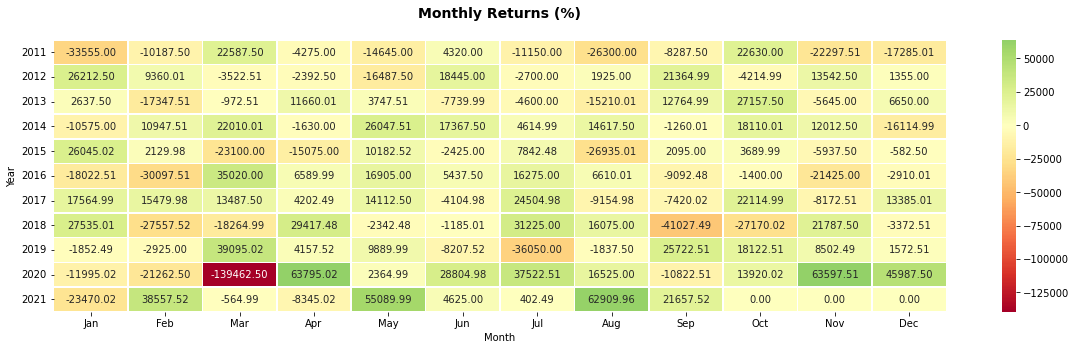

In [ ]:

final=pd.DataFrame()
final['Date']=nifty['Date']
final['ROI'] = nifty['Future']
final['Date']= pd.to_datetime(final['Date'])
final = final.groupby(['Date']).sum() # combine same days trade
monthly=final.resample('1M').sum()
mrh.plot( monthly['ROI'] / 100,figsize = (20, 5))
print('MONTHLY FUTURE')
plt.show()

Quaterly ROI


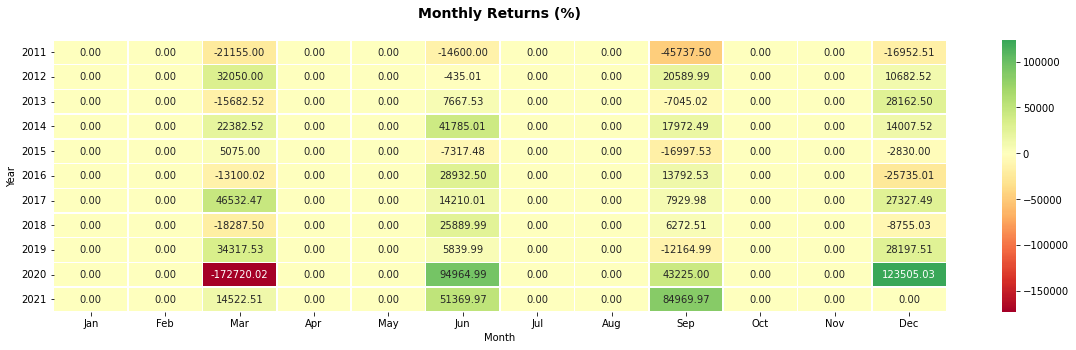

In [ ]:
quaterly=final.resample('Q').sum()
mrh.plot( quaterly['ROI'] / 100,figsize = (20, 5))
print('Quaterly ROI')
plt.show()

yearly ROI


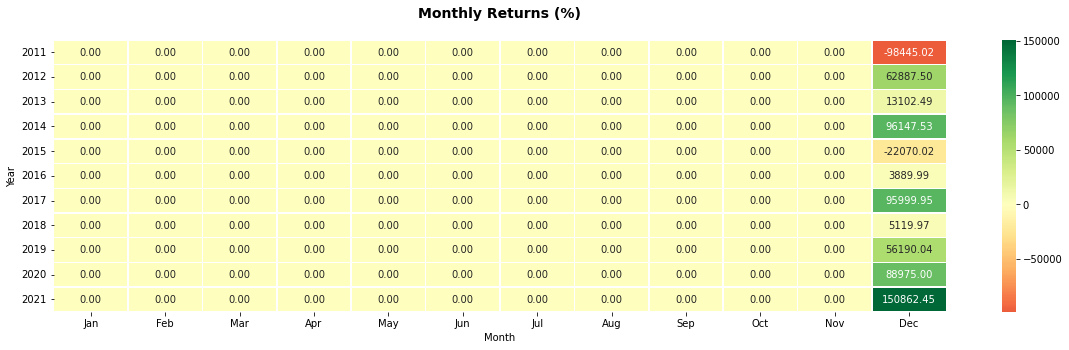

In [ ]:
yearly=final.resample('A').sum()
mrh.plot( yearly['ROI']/ 100,figsize = (20, 5))
print('yearly ROI')
plt.show()

yearly ROI


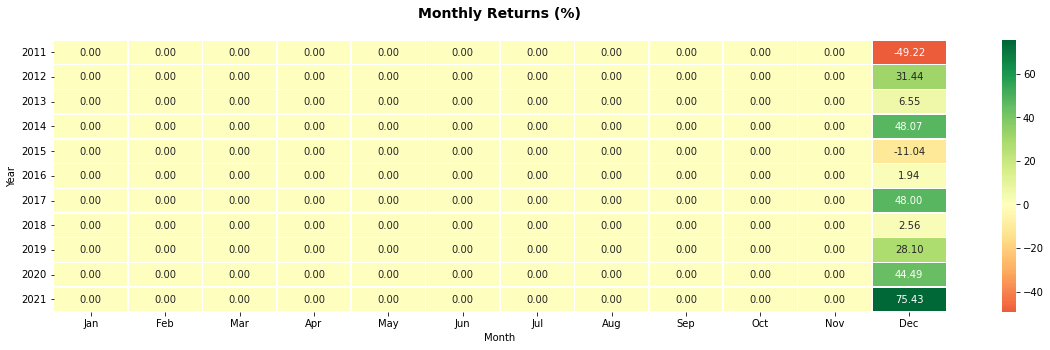

In [ ]:
yearly=final.resample('A').sum()
mrh.plot( yearly['ROI']/ 200000,figsize = (20, 5))
print('yearly ROI')
plt.show()

In [ ]:
df = yf.download('^NSEI', 
                  start='2011-01-01', 
                  end='2011-02-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,6177.450195,6178.549805,6147.200195,6157.600098,6157.600098,0
2011-01-04,6172.750000,6181.049805,6124.399902,6146.350098,6146.350098,0
2011-01-05,6141.350098,6141.350098,6062.350098,6079.799805,6079.799805,0
2011-01-06,6107.000000,6116.149902,6022.299805,6048.250000,6048.250000,0
2011-01-07,6030.899902,6051.200195,5883.600098,5904.600098,5904.600098,0
2011-01-10,5901.299805,5907.250000,5740.950195,5762.850098,5762.850098,0
2011-01-11,5767.950195,5842.600098,5698.200195,5754.100098,5754.100098,0
2011-01-12,5800.049805,5874.200195,5711.299805,5863.250000,5863.250000,0
2011-01-13,5850.750000,5857.750000,5736.700195,5751.899902,5751.899902,0
